<a href="https://colab.research.google.com/github/quantum-intelligence/computational-physics/blob/main/CP_Lecture_17_solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computational Physics
## Lecture 17
### Fourier Transform

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time
from scipy.fft import fft, ifft, fftfreq
%matplotlib inline
import pandas_datareader.data as web
import datetime as dt


In [ ]:
!pip install yfinance

In [2]:
# !pip install pandas-datareader
!pip install --upgrade pandas


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 28.8 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.


In [3]:
import pandas_datareader as pdr

In [4]:
pip install --upgrade pandas-datareader

### QUESTIONS
Create a synthetic data set comprising a sum of sine functions.
- Do an FFT analysis for 1 sine function
- Do an FFT analysis for 1 sine function + constant
- Consider 5 sine functions (with frequencies 1,2,3,4,5)
- Vary the sampling rate and/or step size to test the Nyquist frequency. What is the role of aliasing in your analysis?

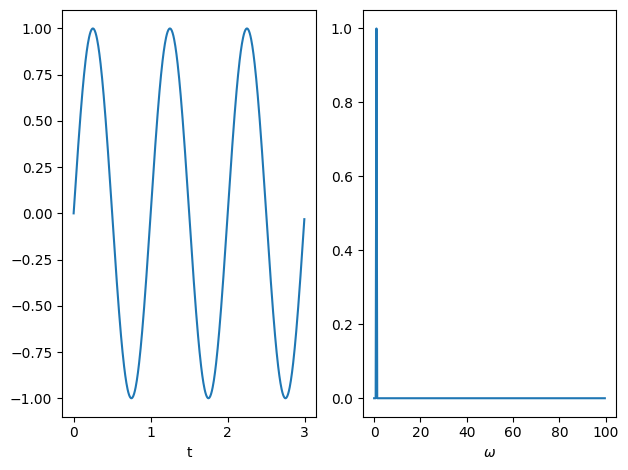

In [6]:
# Do an FFT analysis for 1 sine function
N = 600 #number points
T = 1.0/200.0 #spacing
x = np.linspace(0, N*T, N, endpoint=False)
y = np.sin(np.pi*2*x)
yk = fft(y)
xk = fftfreq(N, T)[:N//2]
plt.subplot(1,2,1)
plt.plot(x,y)
plt.xlabel('t')
plt.subplot(1,2,2)
plt.plot(xk, 2.0/N * np.abs(yk[0:N//2]))
plt.xlabel('$\omega$')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


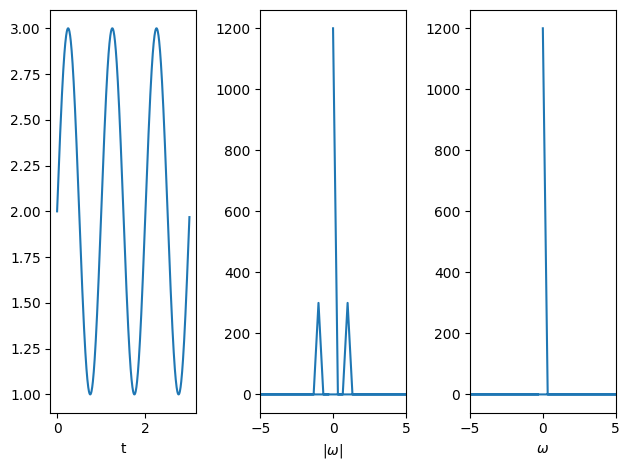

In [7]:
# Do an FFT analysis for 1 sine function + constant

N = 600 #number points
T = 1.0/200.0 #spacing
x = np.linspace(0, N*T, N, endpoint=False)
y = np.sin(np.pi*2*x) + 2
yk = fft(y)
xk = fftfreq(N, T)
plt.subplot(1,3,1)
plt.plot(x,y)
plt.xlabel('t')
plt.subplot(1,3,2)
plt.plot(xk, np.abs(yk)) #need to include real and imaginary parts
plt.xlim(-5,5)
plt.xlabel('$|\omega$|')
plt.subplot(1,3,3)
plt.plot(xk, yk) #plot real parts only
plt.xlim(-5,5)
plt.xlabel('$\omega$')
plt.tight_layout()
plt.show()


In [8]:
print("yk has real and imaginary components: \n")
print(yk[:10])

yk has real and imaginary components: 

[ 1.20000000e+03-0.00000000e+00j -1.23649852e-15+7.07778541e-15j
  7.98728134e-15+8.82078255e-15j -5.04171396e-14-3.00000000e+02j
  7.09666053e-15-6.77730010e-15j -3.15845381e-15-1.18022134e-14j
 -8.44815042e-15-2.92738928e-15j  3.65264224e-15+1.44726162e-15j
  1.02463146e-14-6.75481574e-16j  4.42047693e-16-3.47872352e-15j]


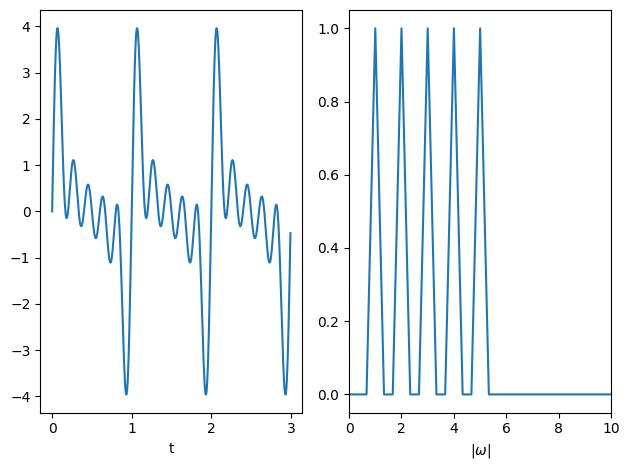

In [9]:
# Consider 5 sine functions (with frequencies 1,2,3,4,5)
N = 600 #number points
T = 1.0/200.0 #spacing
x = np.linspace(0, N*T, N, endpoint=False)

def geny(n):
  sum = 0
  for ith in np.arange(n):
    ith = ith + 1
    sum = sum + np.sin(2*np.pi*ith*x)
  return sum

n = 5
y = geny(n)
yk = fft(y)
xk = fftfreq(N, T)
xk = fftfreq(N, T)[:N//2]
plt.subplot(1,2,1)
plt.plot(x,y)
plt.xlabel('t')
plt.subplot(1,2,2)
plt.plot(xk, 2.0/N * np.abs(yk[0:N//2]))
plt.xlim(0,10)
plt.xlabel('$|\omega$|')

plt.tight_layout()
plt.show()

### Consider real world data
- We will use stock market data which can seem periodic at times

In [10]:
start = dt.datetime(2015, 1, 1)
end = dt.datetime.now()

In [18]:
import yfinance as yf

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open     Volume
Ticker            TSLA        TSLA        TSLA        TSLA       TSLA
Date                                                                 
2023-01-03  108.099998  118.800003  104.639999  118.470001  231402800
2023-01-04  113.639999  114.589996  107.519997  109.110001  180389000
2023-01-05  110.339996  111.750000  107.160004  110.510002  157986300
2023-01-06  113.059998  114.389999  101.809998  103.000000  220911100
2023-01-09  119.769997  123.519997  117.110001  118.959999  190284000


In [25]:
try:
  df = pdr.get_data_yahoo("TSLA", start=start, end=end) #Tesla
  df = pdr.get_data_yahoo("SPY") #, start, end) #SP500 index
except:
  df = yf.download('SPY', start='2020-01-01', end='2025-04-30')
# df = web.DataReader("TSLA", 'yahoo', start, end) #Tesla #use pdr instead
# df = web.DataReader("SPY", 'yahoo', start, end) #SP500 index

[*********************100%***********************]  1 of 1 completed


In [26]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,SPY,SPY,SPY,SPY,SPY
Date,,,,,
2020-01-02,300.291534,300.310039,298.128574,299.062170,59151200
2020-01-03,298.017761,299.154715,296.806873,296.862331,77709700
2020-01-06,299.154633,299.237820,296.122758,296.242927,55653900
2020-01-07,298.313538,299.062254,297.860590,298.581577,40496400
2020-01-08,299.903320,301.132685,298.257990,298.507552,68296000


In [27]:
# assume time steps of one day and no weekends
t =  np.arange(len(df))
price = df['Close']; price = np.asarray(price)

Text(0, 0.5, 'price')

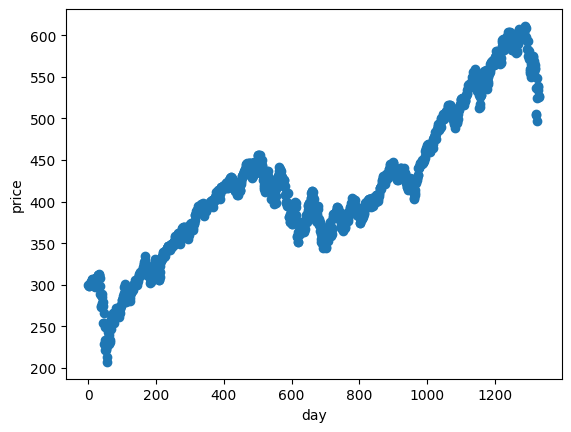

In [28]:
#plot price data over a number of days
plt.scatter(t,price)
plt.xlabel('day')
plt.ylabel('price')


<ipython-input-29-c76ba7041a4a>:7: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,100)


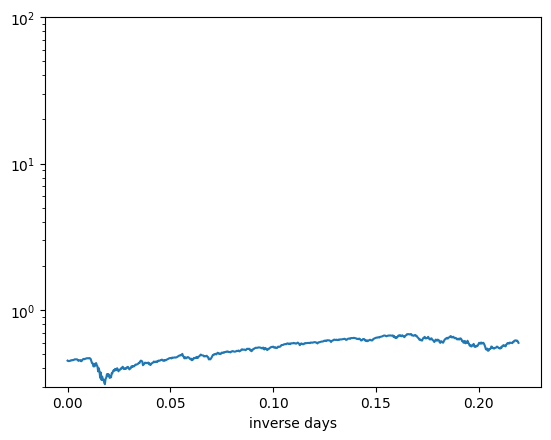

In [29]:
# price = price - np.mean(price) #subtract baseline
price_fft = fft(price)
N = len(price)
T = price[0] - price[1]
xw = fftfreq(N, T)[:N//2]
plt.semilogy(xw, 2.0/N * np.abs(price_fft[0:N//2]))
plt.ylim(0,100)
plt.xlabel("inverse days")
plt.show()

In [ ]:
### QUESTION:
- vary the window and repeat the analysis
- smooth data and repeat the analysis
- repeat the above for the SP500
- How could you use your analysis to predict the stock price?